# (04) Gradients -- Draft

**Motivation**: Following Francesca and Jo's paper. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
# HIDE CODE


def default_props_anesth(
        num_k: int = 7,
        perc: int = 15,
        **kwargs, ):
    mice = Mice(512)
    mice.set_kws(
        desc_ca2='preproc',
        desc_bold='rabies-hp',
    )
    props_base = {
        'mice': mice,
        'num_k': num_k,
        'task': 'rest',
        'perc': f'p{perc}-sample',
        'metric': 'pearson',
        'sv_props': {
            'match_using': 'gam',
            'match_metric': 'euclidean'},
        'graph_type': 'real',
        'kw_kmeans': {'n_init': 100},
        'verbose': False,
    }
    kwargs = setup_kwargs(props_base, kwargs)
    props_ca = {'mode': 'ca2', **kwargs}
    return mice, props_ca

## Prep

In [3]:
mice = Mice(512)
bs = Base(mice, mode='ca2')
kws_show = show_kws(7)

pal = prepare_palette()
translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}

fig_dir = pjoin(fig_base_dir, 'rebuttal')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal

## Test

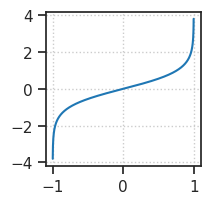

In [4]:
r = np.linspace(-1, 1, 2001)
z = np.arctanh(r)

fig, ax = create_figure(1, 1, (2, 2))
ax.plot(r, z)
ax.grid()
plt.show()

## Load adjacencies

In [5]:
# adj, _ = collect_adjacencies(mice, 'bold-lite')
mice.set_kws(band_bold=(0.01, 0.5), desc_bold='rabies-hp')
a, _ = collect_adjacencies(mice, 'bold-lite', 1.0)
z = bn.nanmean(np.arctanh(a), 0)
r = np.tanh(z)

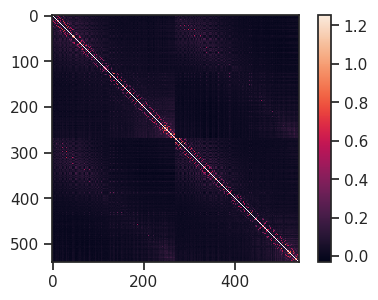

In [6]:
plt.imshow(z)
plt.colorbar();

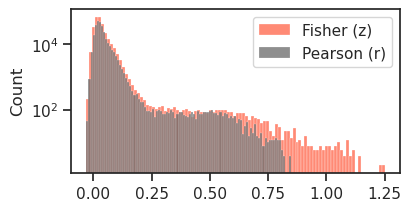

In [7]:
fit, ax = create_figure(1, 1, (4, 2), 'all', 'all', 'constrained')

sns.histplot(
    z[z.nonzero()],
    color='tomato', label='Fisher (z)', bins=100, ax=ax)

sns.histplot(
    r[np.logical_and(r != 0, r != 1)],
    color='dimgrey', label='Pearson (r)', bins=100, ax=ax)

ax.set_yscale('log')
ax.legend()

plt.show()

### KMeans

#### on ```r```

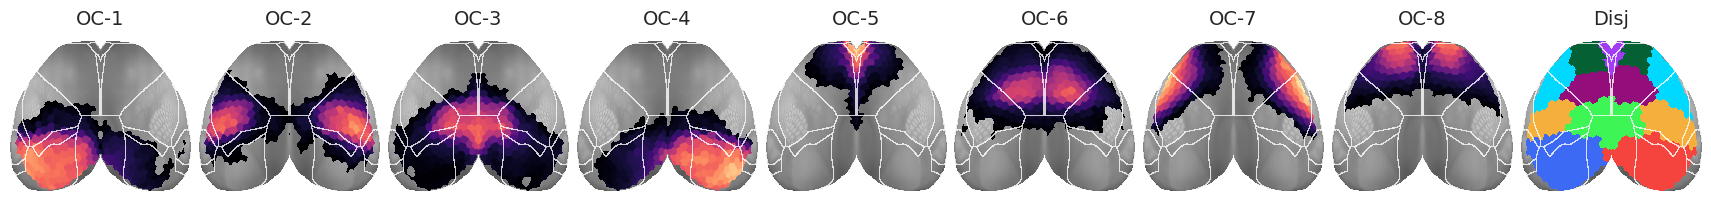

In [8]:
centroids, km = fit_kmeans(r, 8, 'euclidean', kw_kmeans={'n_init': 100, 'max_iter': 500})
pi = centroids / centroids.sum(0, keepdims=True)

bs.show(
    pi,
    vmin=0.1,
    vmax=pi.max(),
    mask_thresh=0.1,
    figsize=(17, 3),
    add_disjoint=True,
    titles=True,
    layout='constrained',
);

#### on ```z```

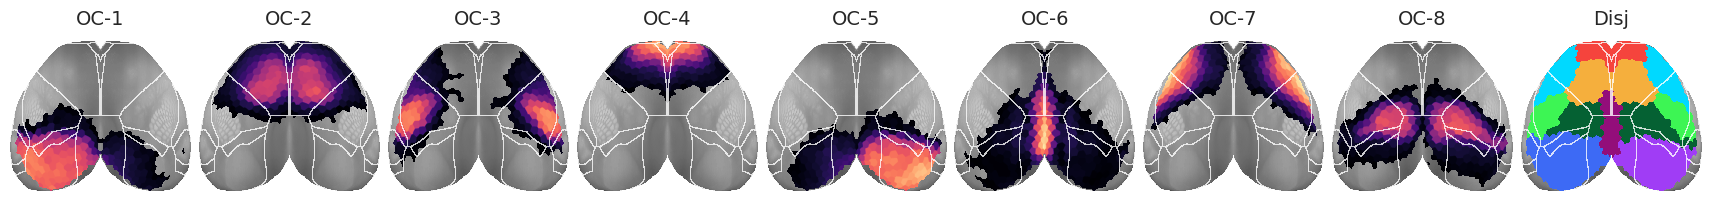

In [9]:
z_fill = z.copy()
z_fill[~np.isfinite(z)] = np.max(z[np.isfinite(z)])
centroids, km = fit_kmeans(z_fill, 8, 'euclidean', kw_kmeans={'n_init': 100, 'max_iter': 500})
pi = centroids / centroids.sum(0, keepdims=True)

bs.show(
    pi,
    vmin=0.1,
    vmax=pi.max(),
    mask_thresh=0.1,
    figsize=(17, 3),
    add_disjoint=True,
    titles=True,
    layout='constrained',
);

## CAS

In [10]:
mice.set_kws(band_ca2=(0.01, 0.5), desc_ca2='preproc')
a, _ = collect_adjacencies(mice, 'ca2', 1.0)
z = bn.nanmean(np.arctanh(a), 0)
r = np.tanh(z)

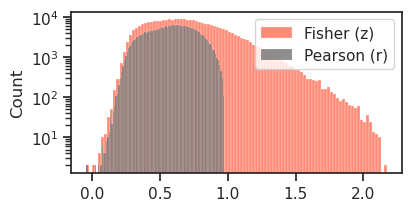

In [11]:
fit, ax = create_figure(1, 1, (4, 2), 'all', 'all', 'constrained')

sns.histplot(
    z[z.nonzero()],
    color='tomato', label='Fisher (z)', bins=100, ax=ax)

sns.histplot(
    r[np.logical_and(r != 0, r != 1)],
    color='dimgrey', label='Pearson (r)', bins=100, ax=ax)

ax.set_yscale('log')
ax.legend()

plt.show()

### KMeans

#### on ```r```

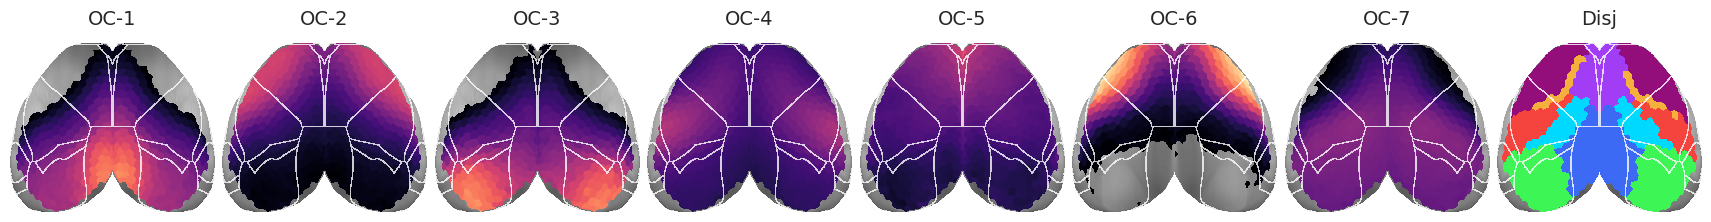

In [12]:
r_fill = np.nan_to_num(r)
centroids, km = fit_kmeans(r_fill, 7, 'euclidean', kw_kmeans={'n_init': 100, 'max_iter': 500})
pi = centroids / centroids.sum(0, keepdims=True)

bs.show(
    pi,
    vmin=0.1,
    vmax=pi.max(),
    mask_thresh=0.1,
    figsize=(17, 3),
    add_disjoint=True,
    titles=True,
    layout='constrained',
);

#### on ```z```

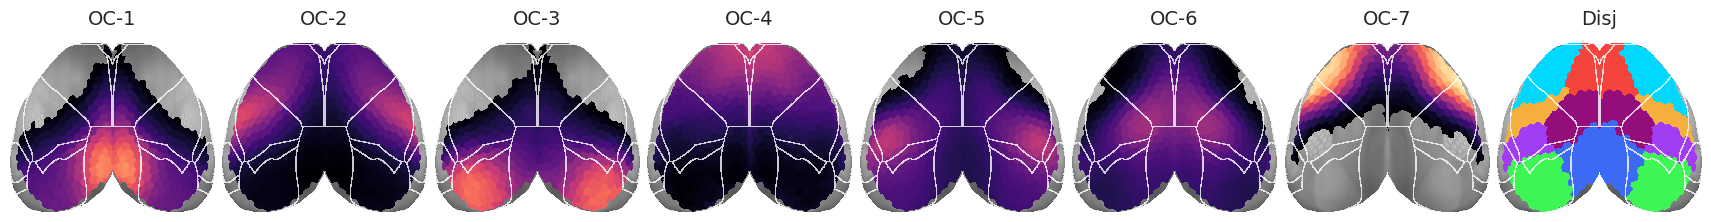

In [13]:
z_fill = z.copy()
z_fill[~np.isfinite(z)] = np.max(z[np.isfinite(z)])
centroids, km = fit_kmeans(z_fill, 7, 'euclidean', kw_kmeans={'n_init': 100, 'max_iter': 500})
pi = centroids / centroids.sum(0, keepdims=True)

bs.show(
    pi,
    vmin=0.1,
    vmax=pi.max(),
    mask_thresh=0.1,
    figsize=(17, 3),
    add_disjoint=True,
    titles=True,
    layout='constrained',
);

## Grads

In [14]:
sys.path.insert(0, os.path.join(git_dir, 'mapalign'))
from mapalign import embed

In [23]:
d = (np.nan_to_num(r) + 1) / 2.
np.min(d), np.max(d)

(0.4779780408067853, 1.0)

In [26]:
np.unique(d - d.T)

array([0.])

In [39]:
embedding_results, embedding_dict = embed.compute_diffusion_map(
    d, n_components=10, return_result=True)
embedding_results = embedding_results.T

In [40]:
list(embedding_dict)

['lambdas', 'vectors', 'n_components', 'diffusion_time', 'n_components_auto']

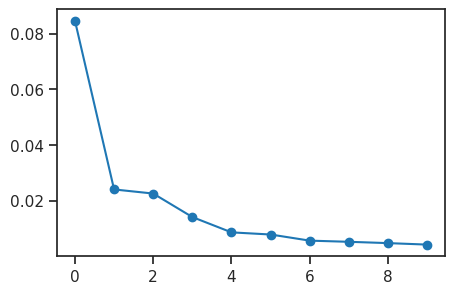

In [41]:
plt.plot(embedding_dict['lambdas'], marker='o');

[<matplotlib.lines.Line2D object at 0x7f7a638b7790>]

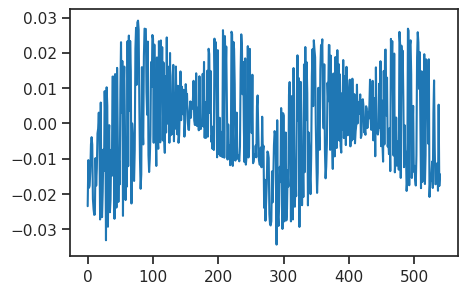

In [45]:
plt.plot(embedding_results[3])

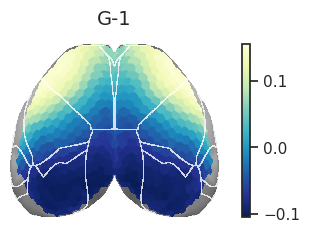

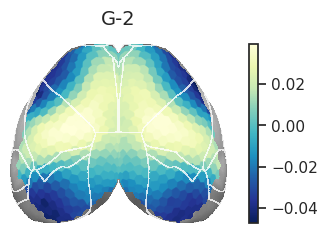

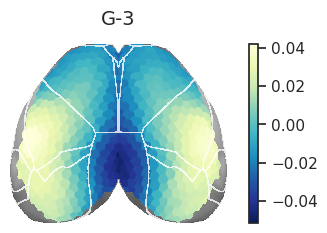

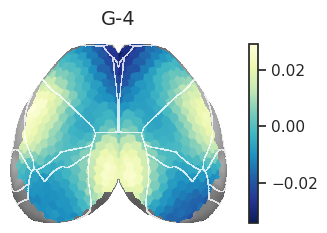

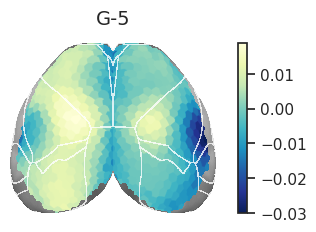

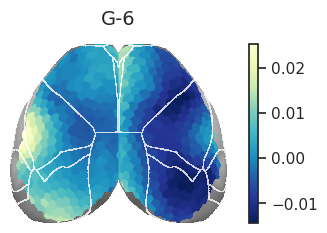

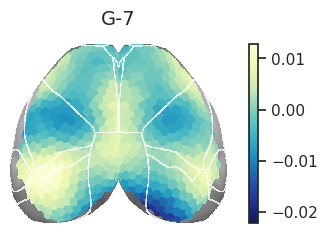

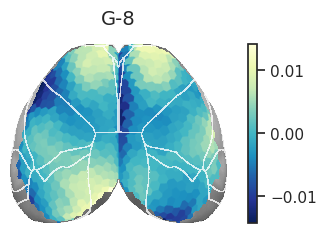

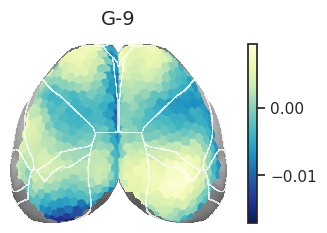

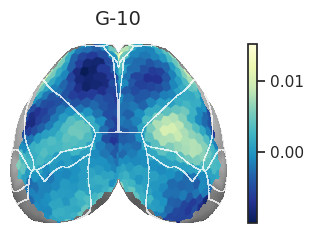

In [57]:
for i in range(10):
    bs.show(
        embedding_results[i],
        vmin=None,
        vmax=None,
        figsize=(5, 2.5),
        titles=[f"G-{i+1}"],
        cbar=True,
        cmap='YlGnBu_r',
    );